## Load the csv file that contains year, port, species names, latitude, longitude, and fish biomass

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.set_option("display.max_columns", 60)
pd.set_option("display.notebook_repr_html", True)


In [2]:
df = pd.read_csv("Merged_df.csv")

#### Explore the dataframe

In [3]:
df.head(3)

,year,port,depth (m),species,#/ha,kg/ha,Lat,Long,Species Name,Port Name
0,1973,210,18,106,3079.45,9.67760,44.51766667,-86.25953333,Alewife,"Frankfort, MI"
1,1973,210,27,106,423.61,14.23006,44.51158333,-86.26861667,Alewife,"Frankfort, MI"
2,1973,210,37,106,998.16,29.25219,44.48521667,-86.29936667,Alewife,"Frankfort, MI"


### Divide the dataframe into two dataframes:nearshore and offshore

In [4]:
df_nearshore = df[df['depth (m)'] < 30]

#### df_nearshore

In [5]:
df_nearshore.head(3)

,year,port,depth (m),species,#/ha,kg/ha,Lat,Long,Species Name,Port Name
0,1973,210,18,106,3079.45,9.67760,44.51766667,-86.25953333,Alewife,"Frankfort, MI"
1,1973,210,27,106,423.61,14.23006,44.51158333,-86.26861667,Alewife,"Frankfort, MI"
10,1974,210,18,106,268.29,0.29679,44.51766667,-86.25953333,Alewife,"Frankfort, MI"


In [6]:
df_offshore = df[df['depth (m)'] >= 30]

#### df_offshore

In [7]:
df_offshore.head(3)

,year,port,depth (m),species,#/ha,kg/ha,Lat,Long,Species Name,Port Name
2,1973,210,37,106,998.16,29.25219,44.48521667,-86.29936667,Alewife,"Frankfort, MI"
3,1973,210,46,106,2862.63,113.40172,44.48383333,-86.30966667,Alewife,"Frankfort, MI"
4,1973,210,55,106,3108.58,127.66344,44.48671667,-86.31763333,Alewife,"Frankfort, MI"


## Analyze nearshore dataframe

#### unique port numbers

In [8]:
unique_ports = df_nearshore.port.unique()
print(unique_ports)

[210 214 224 234 240 248 254]


### See individual port number and names

In [9]:
df[df['port'].isin(unique_ports)][['port', 'Port Name']].drop_duplicates()

,port,Port Name
0,210,"Frankfort, MI"
5268,214,"Ludington, MI"
10584,224,"Saugatuck, MI"
16260,234,"Waukegan, IL"
21468,240,"Port Washington, WI"
26328,248,"Sturgeon Bay, WI"
31632,254,"Manistique, MI"


#### port and depth wise value_counts(). i.e., number of data points at different ports and depths

In [10]:
df_nearshore.groupby('port')['depth (m)'].value_counts()

port  depth (m)
210   18           540
      27           540
214   18           540
      27           540
      9            300
224   9            528
      18           528
      27           528
234   18           528
      27           528
      9            516
240   27           504
      18           492
248   27           540
      18           528
254   18           492
      27           492
      9            420
Name: depth (m), dtype: int64

### Write a function that takes port number and the whole dataframe, and separete the that dataframe by ports
- **input: port number and dataframe**
- **return: port-wise dataframe**

In [11]:
def separate_port_wise(ports, df):
    ''' 
    This function separates the input dataframe into port-wise dataframe according to the input port number 
    '''
    port_string = ports.astype('str')
    df_name = "df_nearshore_"+ port_string
    df_name = df_nearshore[df_nearshore.port==ports]
    return df_name    

### Frankfort-Port 210: nearshore

In [12]:
unique_ports[0]

210

In [13]:
df_port_210_nearshore = separate_port_wise(unique_ports[0], df = df_nearshore)

In [14]:
df_port_210_nearshore.shape

(1080, 10)

In [15]:
df_port_210_nearshore.head(3)

,year,port,depth (m),species,#/ha,kg/ha,Lat,Long,Species Name,Port Name
0,1973,210,18,106,3079.45,9.67760,44.51766667,-86.25953333,Alewife,"Frankfort, MI"
1,1973,210,27,106,423.61,14.23006,44.51158333,-86.26861667,Alewife,"Frankfort, MI"
10,1974,210,18,106,268.29,0.29679,44.51766667,-86.25953333,Alewife,"Frankfort, MI"


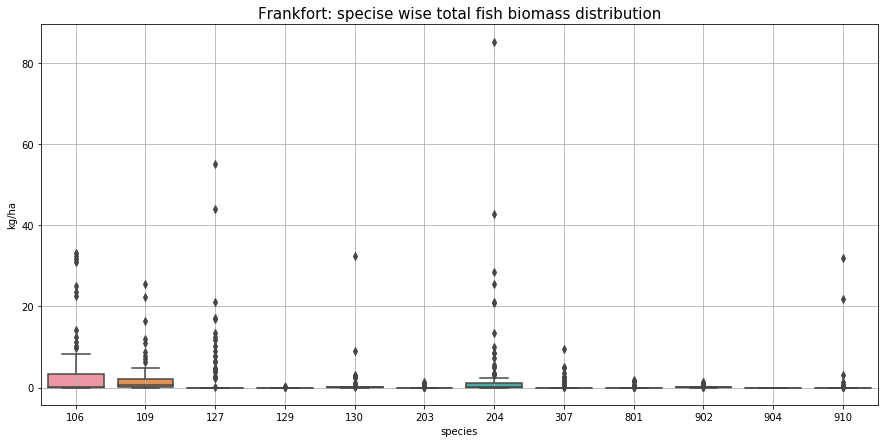

In [16]:
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x = 'species', y = 'kg/ha', data = df_port_210_nearshore, ax=ax)
plt.title("Frankfort: specise wise total fish biomass distribution", fontsize=15)
plt.grid(True)
plt.show()

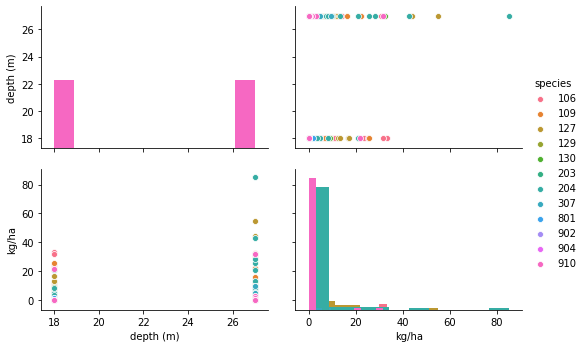

In [17]:
sns.pairplot(data = df_port_210_nearshore, vars = ['depth (m)', 'kg/ha'], hue = 'species', aspect=1.5, diag_kind='hist')
# plt.grid(True)
plt.show()

In [18]:
df_port_210_nearshore['depth (m)'].unique()

array([18, 27], dtype=int64)

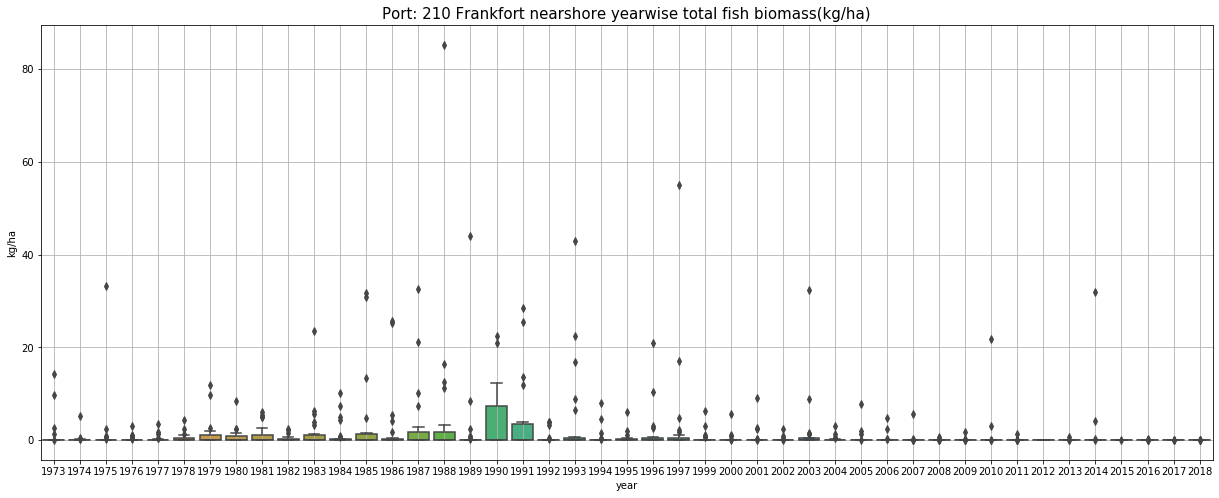

In [19]:
fig1, ax1 = plt.subplots(figsize=(21,8))
sns.boxplot(x = 'year', y = 'kg/ha', data = df_port_210_nearshore, ax=ax1)
plt.title("Port: 210 Frankfort nearshore yearwise total fish biomass(kg/ha)", fontsize=15)
plt.grid(True)
plt.show()

### If we drop outliers, for example, if we drop year-wise biomass over 25 kg/ha, then distribution chagnes

In [20]:
df_port_210_nearshore_drop_outliers = df_port_210_nearshore[df_port_210_nearshore['kg/ha']<=25]

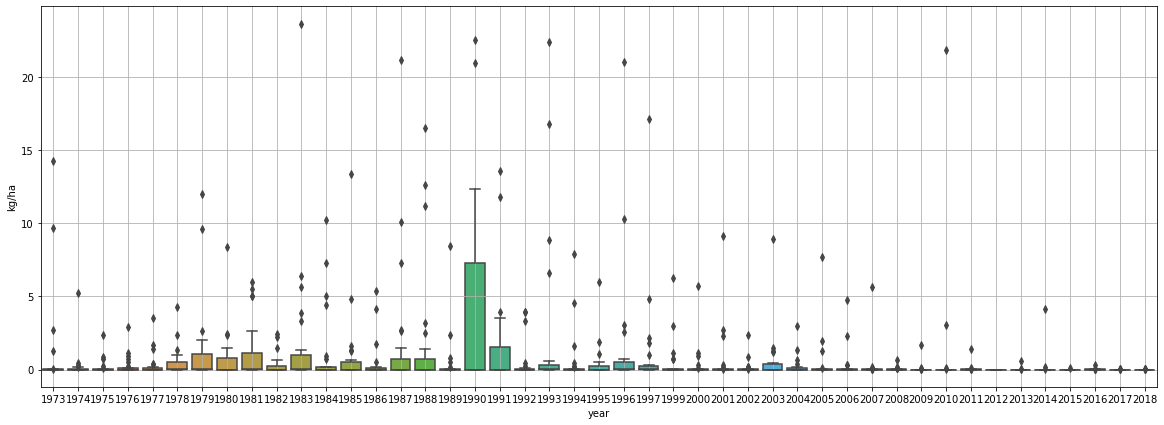

In [21]:
fig2, ax2 = plt.subplots(figsize=(20,7))
sns.boxplot(x = 'year', y = 'kg/ha', data = df_port_210_nearshore_drop_outliers, ax=ax2)
plt.grid(True)
plt.show()

In [22]:
total_biomass_port_210 = df_port_210_nearshore.groupby('year')['kg/ha'].sum()

In [23]:
# total_biomass_port_210

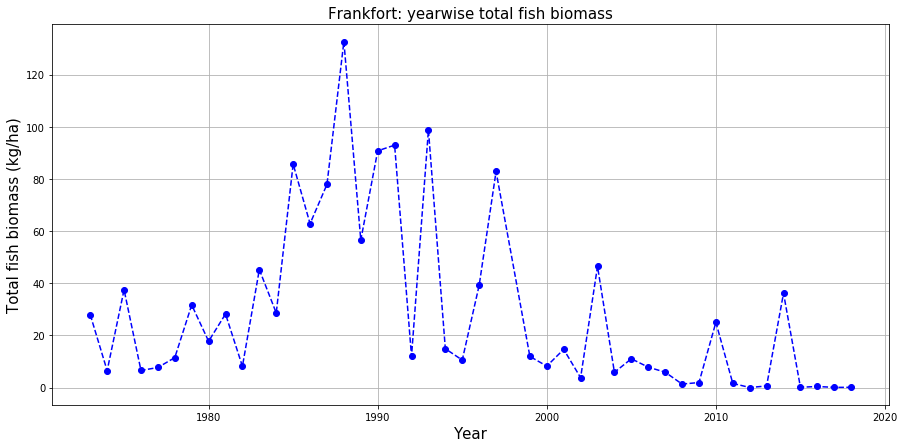

In [24]:
total_biomass_port_210.plot(figsize=(15,7), style='bo--')
plt.title("Frankfort: yearwise total fish biomass", fontsize=15)
plt.xlabel('Year', fontsize= 15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
plt.grid(True)

In [25]:
unique_ports[1]

214

### Ludington-Port 214: nearshore

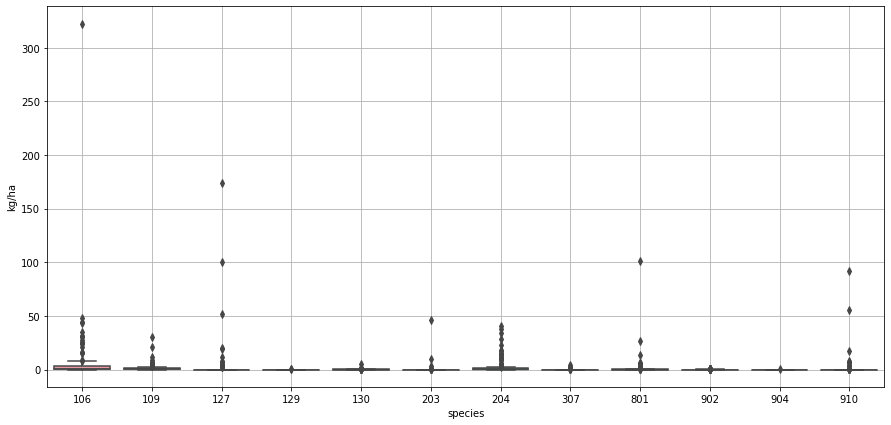

In [26]:
df_port_214_nearshore = separate_port_wise(unique_ports[1], df = df_nearshore)
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x = 'species', y = 'kg/ha', data = df_port_214_nearshore, ax=ax)
plt.grid(True)
plt.show()

In [27]:
total_biomass_port_214 = df_port_214_nearshore.groupby('year')['kg/ha'].sum()

In [28]:
total_biomass_port_214

year
1973      8.78304
1974     53.11347
1975     16.89547
1976      7.62501
1977     15.50097
1978     36.77074
1979     30.27680
1980     40.44416
1981     78.29005
1982     13.01311
1983    135.81969
1984     74.69864
1985     94.97365
1986    125.41903
1987    150.04988
1988    455.32583
1989     38.24200
1990     28.87888
1991     68.58422
1992     29.28650
1993    156.15390
1994     56.62075
1995     14.56949
1996     62.12956
1997    177.29391
1999     19.51441
2000     38.25053
2001      0.76987
2002      5.87469
2003     17.65693
2004      7.90115
2005      4.44483
2006     15.19079
2007      3.37946
2008     80.34859
2009      0.54821
2010    104.29624
2011      4.39578
2012      0.74653
2013      2.75785
2014      4.89681
2015      0.36705
2016     10.64460
2017      3.30188
2018      6.66442
Name: kg/ha, dtype: float64

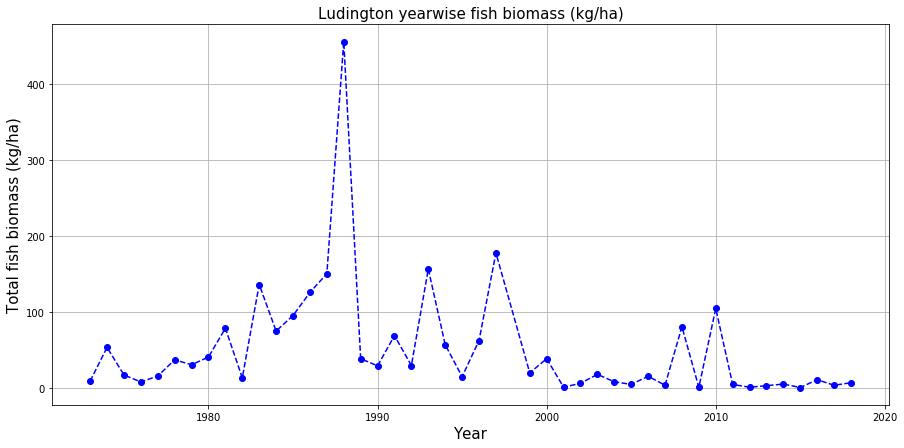

In [29]:
total_biomass_port_214.plot(figsize=(15,7), style='bo--')
plt.title("Ludington yearwise fish biomass (kg/ha)", fontsize= 15)
plt.xlabel('Year', fontsize= 15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
plt.grid(True)

In [30]:
path="Ludington_nearshore_fishbiomass.csv"
total_biomass_port_214.to_csv(path,header=True, index_label="Year")

### Saugatuck-Port 224: nearshore

In [31]:
unique_ports[2]

224

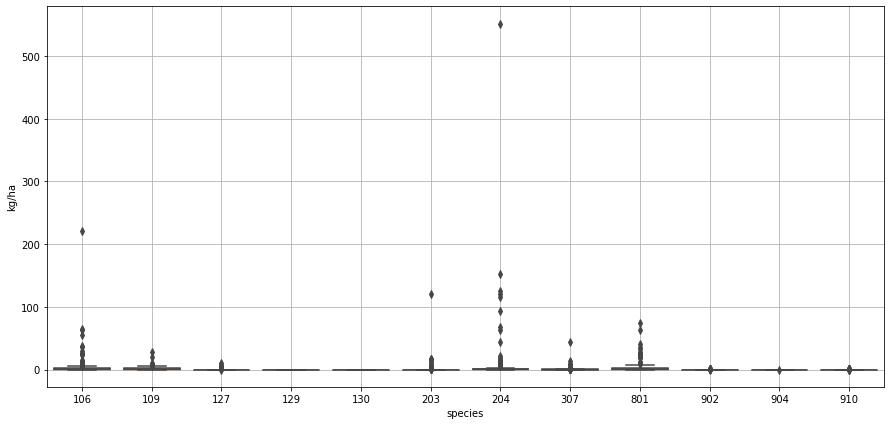

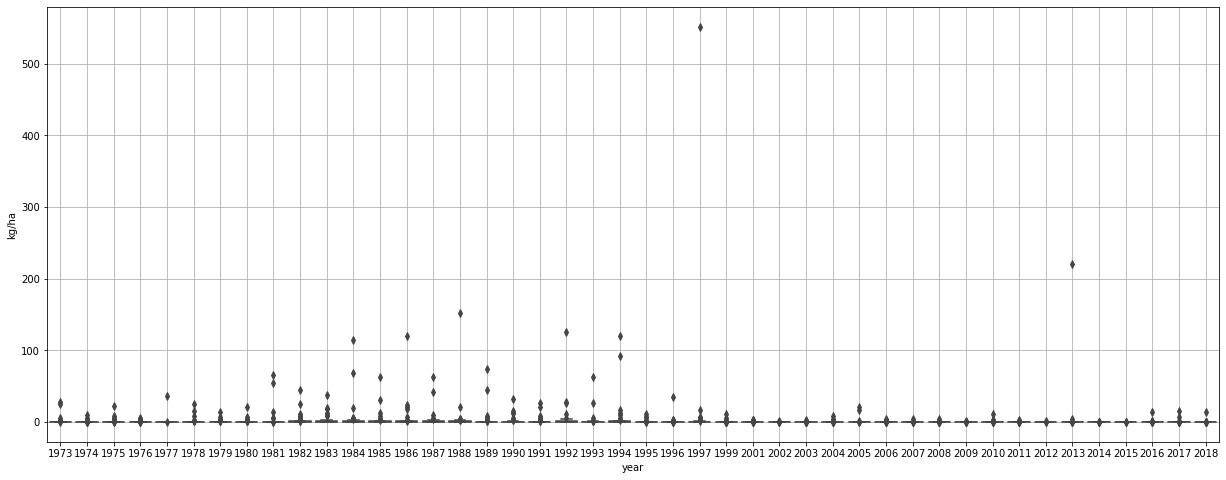

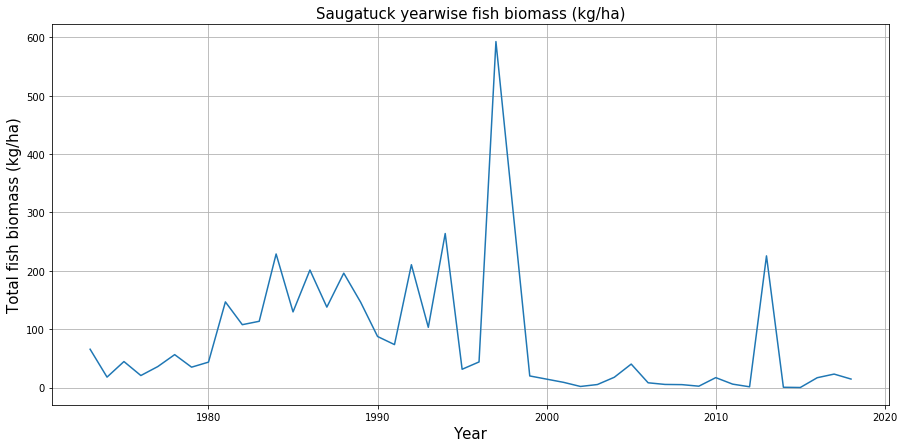

In [32]:
df_port_224_nearshore = separate_port_wise(unique_ports[2], df = df_nearshore)
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x = 'species', y = 'kg/ha', data = df_port_224_nearshore, ax=ax)
plt.grid(True)
plt.show()

fig1, ax1 = plt.subplots(figsize=(21,8))
sns.boxplot(x = 'year', y = 'kg/ha', data = df_port_224_nearshore, ax=ax1)
plt.grid(True)
plt.show()

total_biomass_port_224 = df_port_224_nearshore.groupby('year')['kg/ha'].sum()

total_biomass_port_224.plot(figsize=(15,7))
plt.title("Saugatuck yearwise fish biomass (kg/ha)", fontsize= 15)
plt.xlabel('Year', fontsize= 15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
plt.grid(True)


In [33]:
path="Saugatuck_nearshore_fishbiomass.csv"
total_biomass_port_224.to_csv(path,header=True, index_label="Year")

In [34]:
unique_ports[3]

234

### Waukegan - Port 234: nearshore

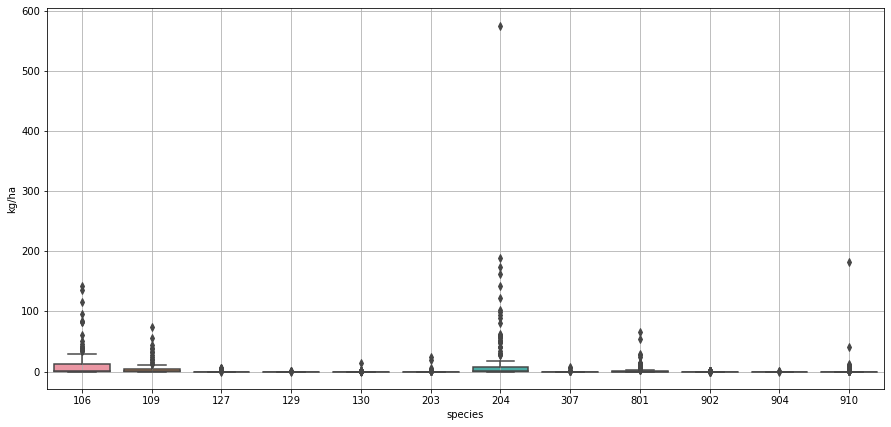

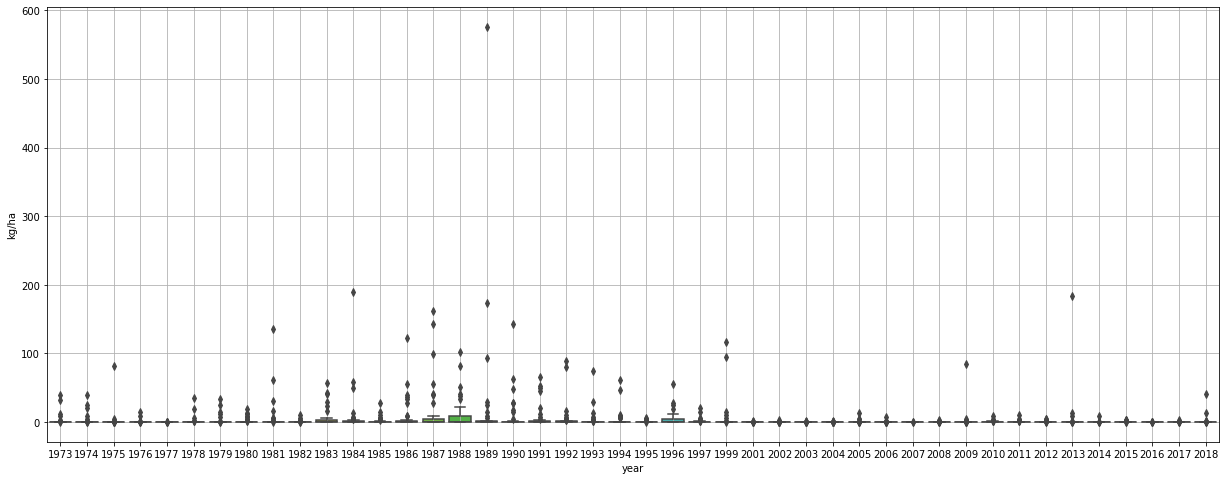

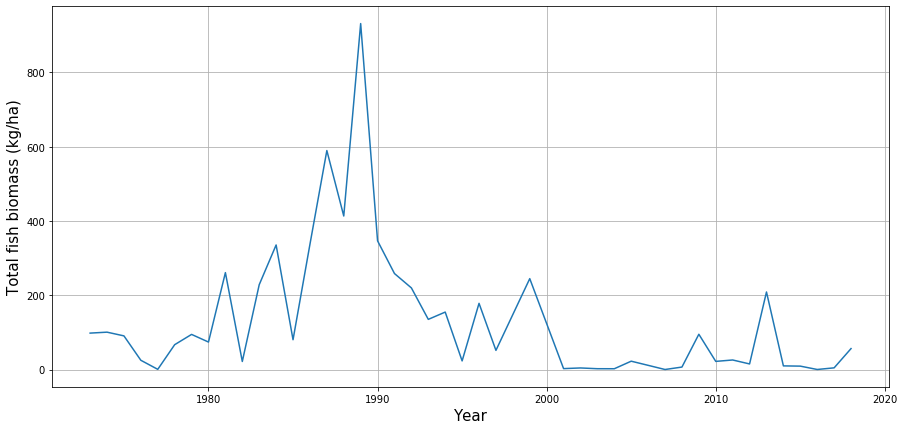

In [35]:
df_port_234_nearshore = separate_port_wise(unique_ports[3], df = df_nearshore)
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x = 'species', y = 'kg/ha', data = df_port_234_nearshore, ax=ax)
plt.grid(True)
plt.show()

fig1, ax1 = plt.subplots(figsize=(21,8))
sns.boxplot(x = 'year', y = 'kg/ha', data = df_port_234_nearshore, ax=ax1)
plt.grid(True)
plt.show()

total_biomass_port_234 = df_port_234_nearshore.groupby('year')['kg/ha'].sum()

total_biomass_port_234.plot(figsize=(15,7))
plt.xlabel('Year', fontsize= 15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
plt.grid(True)


In [36]:
unique_ports[4]

240

### Port Washington - Port 240: nearshore

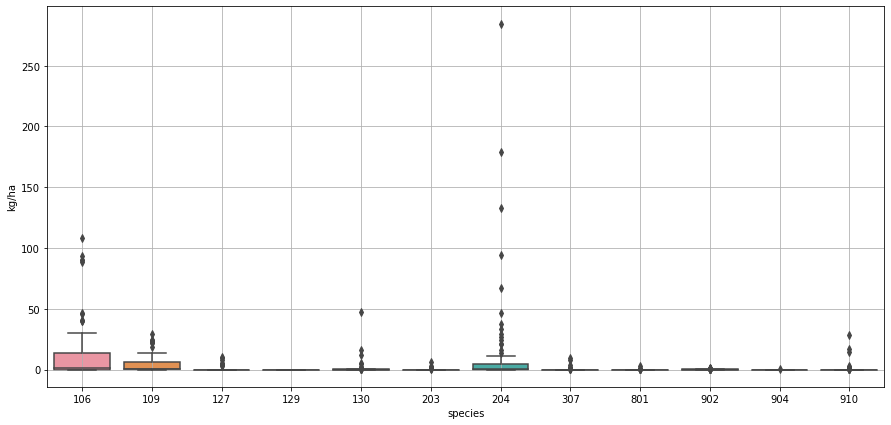

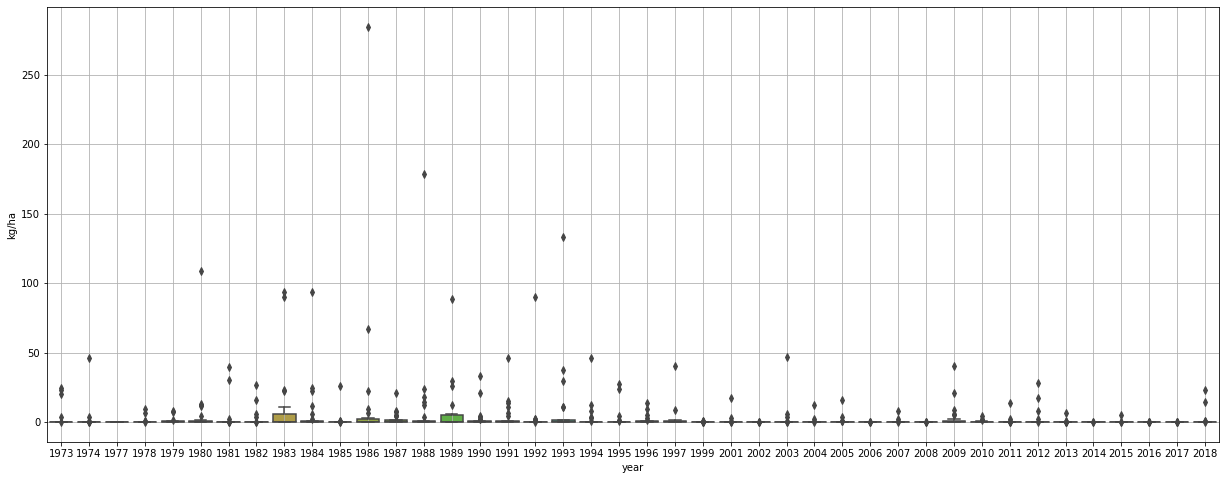

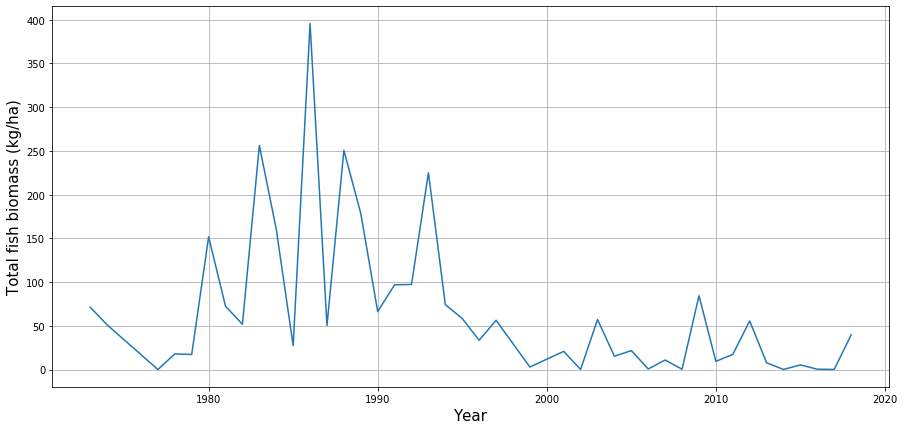

In [37]:
df_port_240_nearshore = separate_port_wise(unique_ports[4], df = df_nearshore)
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x = 'species', y = 'kg/ha', data = df_port_240_nearshore, ax=ax)
plt.grid(True)
plt.show()

fig1, ax1 = plt.subplots(figsize=(21,8))
sns.boxplot(x = 'year', y = 'kg/ha', data = df_port_240_nearshore, ax=ax1)
plt.grid(True)
plt.show()

total_biomass_port_240 = df_port_240_nearshore.groupby('year')['kg/ha'].sum()

total_biomass_port_240.plot(figsize=(15,7))
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
plt.grid(True)

In [38]:
unique_ports[5]

248

### Sturgeon Bay - Port 248: nearshore

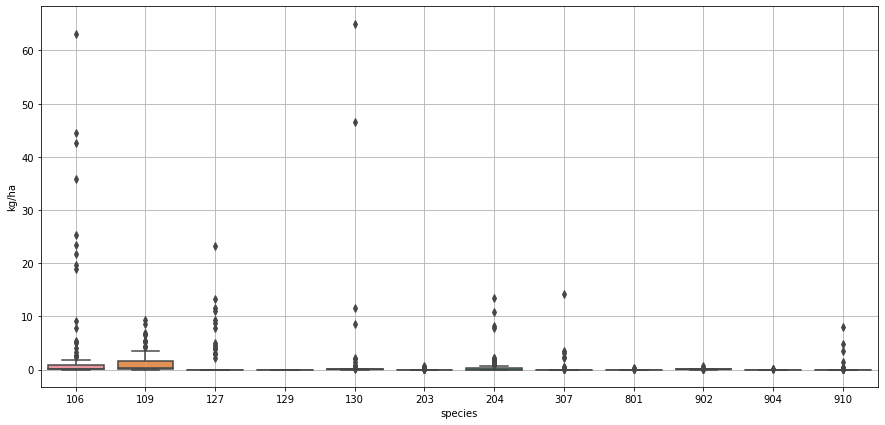

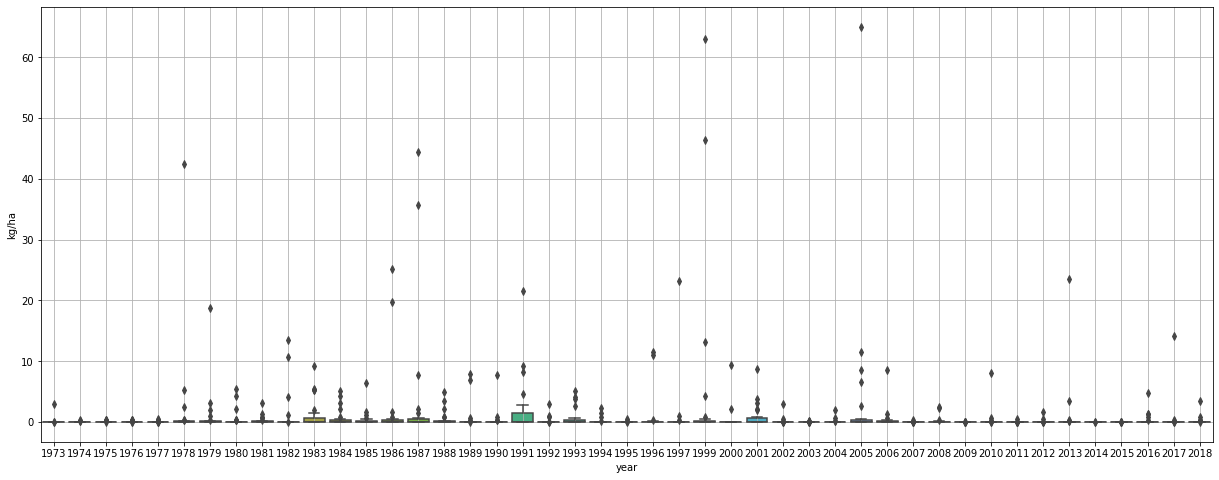

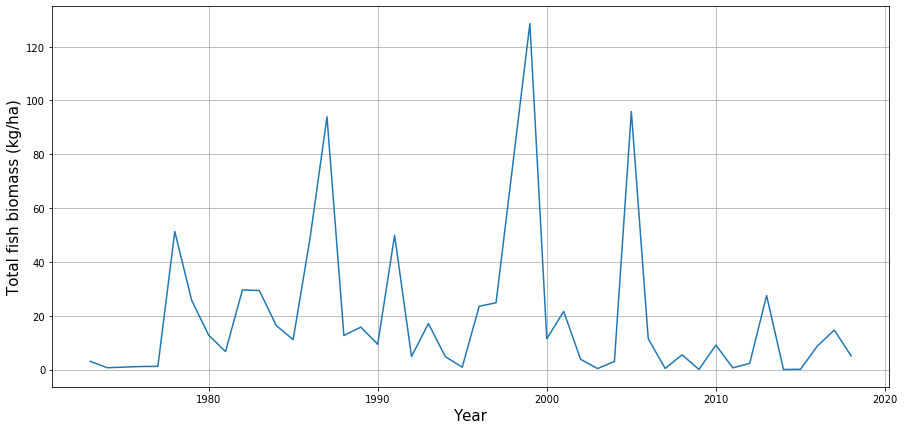

In [39]:
df_port_248_nearshore = separate_port_wise(unique_ports[5], df = df_nearshore)
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x = 'species', y = 'kg/ha', data = df_port_248_nearshore, ax=ax)
plt.grid(True)
plt.show()

fig1, ax1 = plt.subplots(figsize=(21,8))
sns.boxplot(x = 'year', y = 'kg/ha', data = df_port_248_nearshore, ax=ax1)
plt.grid(True)
plt.show()

total_biomass_port_248 = df_port_248_nearshore.groupby('year')['kg/ha'].sum()

total_biomass_port_248.plot(figsize=(15,7))
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
plt.grid(True)

In [40]:
unique_ports[6]

254

### Manistique - Port: 254: nearshore

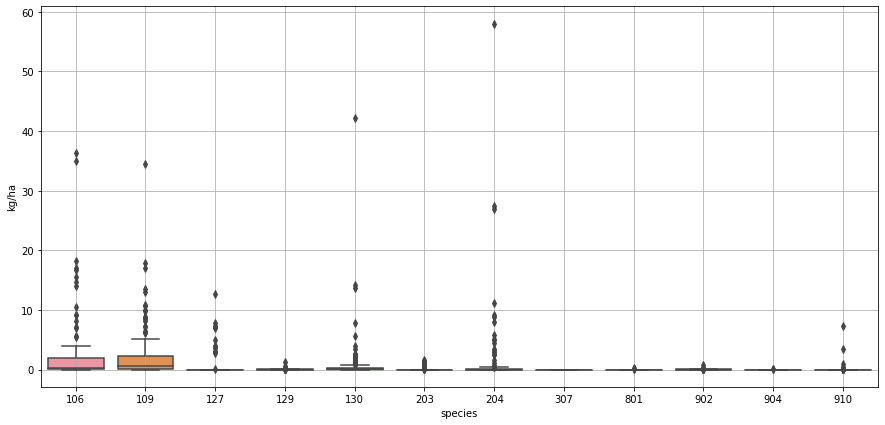

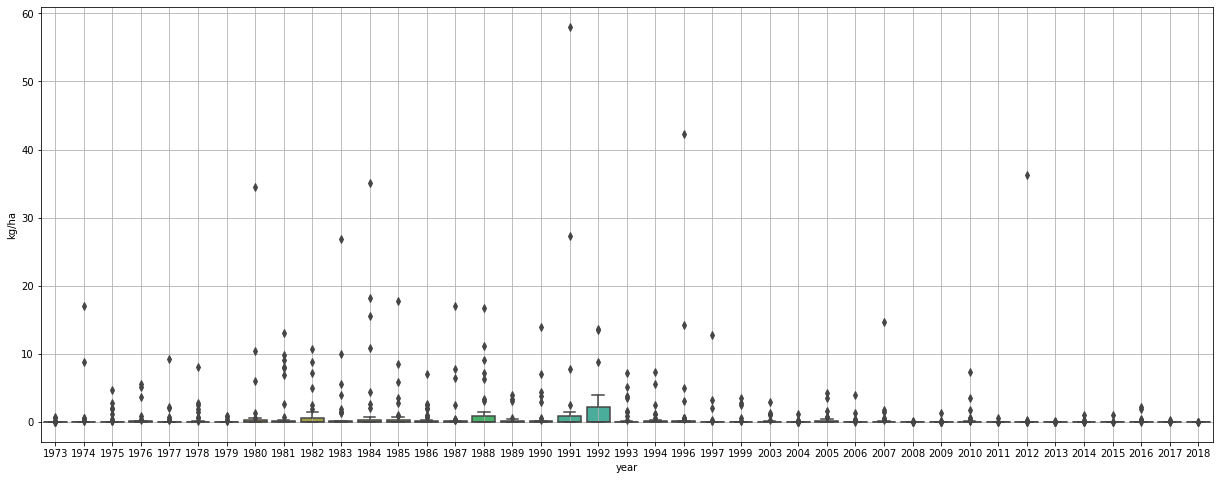

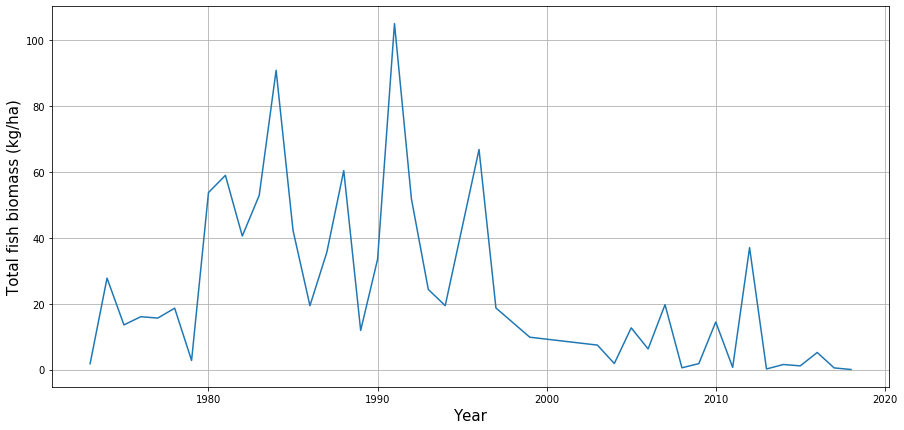

In [41]:
df_port_254_nearshore = separate_port_wise(unique_ports[6], df = df_nearshore)
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x = 'species', y = 'kg/ha', data = df_port_254_nearshore, ax=ax)
plt.grid(True)
plt.show()

fig1, ax1 = plt.subplots(figsize=(21,8))
sns.boxplot(x = 'year', y = 'kg/ha', data = df_port_254_nearshore, ax=ax1)
plt.grid(True)
plt.show()

total_biomass_port_254 = df_port_254_nearshore.groupby('year')['kg/ha'].sum()

total_biomass_port_254.plot(figsize=(15,7))
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
plt.grid(True)

In [42]:
total_biomass_port_254.index

Int64Index([1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
            1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
            1996, 1997, 1999, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64', name='year')

In [43]:
unique_ports

array([210, 214, 224, 234, 240, 248, 254], dtype=int64)

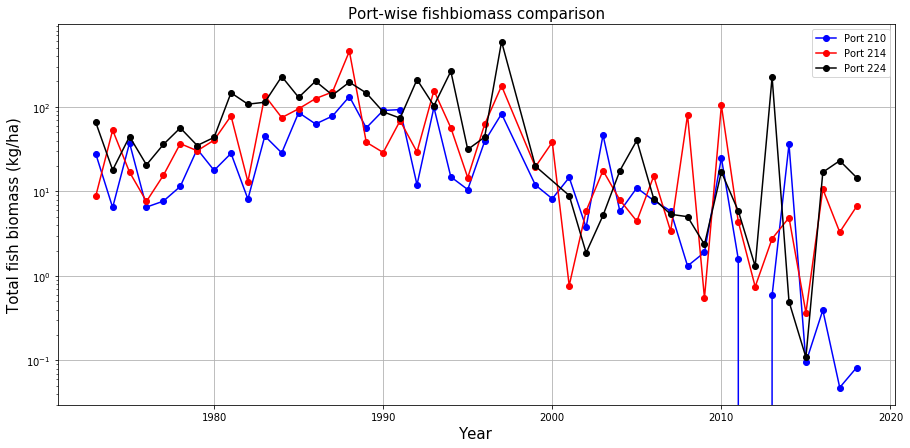

In [44]:
fig. ax0 = plt.subplots(figsize=(15,7))
plt.plot(total_biomass_port_210.index, total_biomass_port_210, 'bo-', label='Port 210')
plt.plot(total_biomass_port_214.index, total_biomass_port_214, 'ro-', label='Port 214')
plt.plot(total_biomass_port_224.index, total_biomass_port_224, 'ko-' , label='Port 224')
# plt.plot(total_biomass_port_234.index, total_biomass_port_234, 'go-', label='Port 234')
# plt.plot(total_biomass_port_240.index, total_biomass_port_240, 'co-' , label='Port 240')
# plt.plot(total_biomass_port_248.index, total_biomass_port_248, 'b-', label='Port 248')
# plt.plot(total_biomass_port_254.index, total_biomass_port_254, 'r-' ,label='Port 254')
plt.legend()
plt.grid(True)
plt.title("Port-wise fishbiomass comparison", fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
plt.yscale('log')
plt.show()

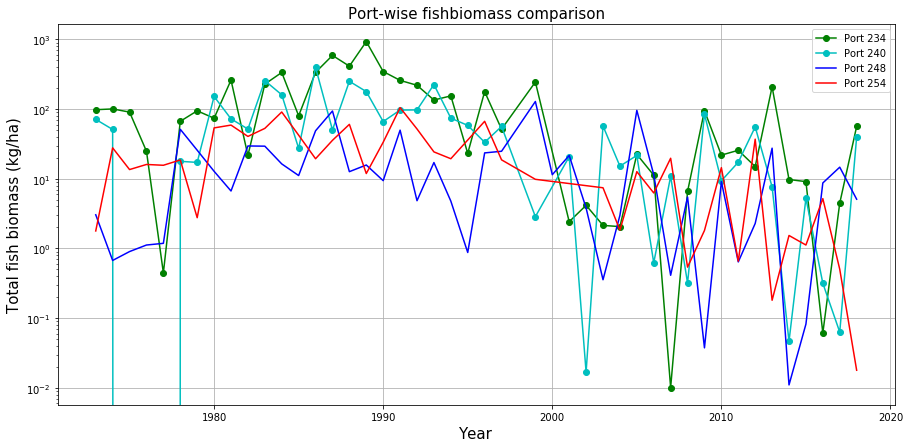

In [45]:
fig. ax0 = plt.subplots(figsize=(15,7))
# plt.plot(total_biomass_port_210.index, total_biomass_port_210, 'bo-', label='Port 210')
# plt.plot(total_biomass_port_214.index, total_biomass_port_214, 'ro-', label='Port 214')
# plt.plot(total_biomass_port_224.index, total_biomass_port_224, 'ko-' , label='Port 224')
plt.plot(total_biomass_port_234.index, total_biomass_port_234, 'go-', label='Port 234')
plt.plot(total_biomass_port_240.index, total_biomass_port_240, 'co-' , label='Port 240')
plt.plot(total_biomass_port_248.index, total_biomass_port_248, 'b-', label='Port 248')
plt.plot(total_biomass_port_254.index, total_biomass_port_254, 'r-' ,label='Port 254')
plt.legend()
plt.grid(True)
plt.title("Port-wise fishbiomass comparison", fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
plt.yscale('log')
plt.show()

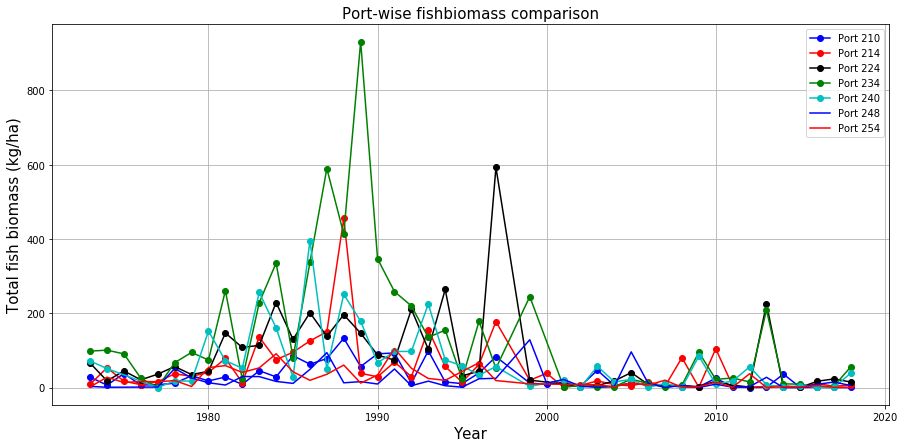

In [46]:
fig. ax0 = plt.subplots(figsize=(15,7))
plt.plot(total_biomass_port_210.index, total_biomass_port_210, 'bo-', label='Port 210')
plt.plot(total_biomass_port_214.index, total_biomass_port_214, 'ro-', label='Port 214')
plt.plot(total_biomass_port_224.index, total_biomass_port_224, 'ko-' , label='Port 224')
plt.plot(total_biomass_port_234.index, total_biomass_port_234, 'go-', label='Port 234')
plt.plot(total_biomass_port_240.index, total_biomass_port_240, 'co-' , label='Port 240')
plt.plot(total_biomass_port_248.index, total_biomass_port_248, 'b-', label='Port 248')
plt.plot(total_biomass_port_254.index, total_biomass_port_254, 'r-' ,label='Port 254')
plt.legend()
plt.title("Port-wise fishbiomass comparison", fontsize=15)
plt.grid(True)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
# plt.yscale('log')
plt.show()

In [47]:
# fig. ax0 = plt.subplots(figsize=(15,7))
# plt.plot(total_biomass_port_210.index, total_biomass_port_210, 'bo-', label='Port 210')
# plt.plot(total_biomass_port_214.index, total_biomass_port_214, 'ro-', label='Port 254')
# plt.plot(total_biomass_port_224.index, total_biomass_port_224, 'ko-' , label='Port 224')
# plt.plot(total_biomass_port_234.index, total_biomass_port_234, 'go-', label='Port 254')
# plt.plot(total_biomass_port_240.index, total_biomass_port_240, 'co-' , label='Port 254')
# plt.plot(total_biomass_port_248.index, total_biomass_port_248, 'b-', label='Port 248')
# plt.plot(total_biomass_port_254.index, total_biomass_port_254, 'r-' ,label='Port 254')
# plt.legend()
# plt.grid(True)
# plt.xlabel('Year', fontsize=15)
# plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
# plt.yscale('log')
# plt.show()

In [48]:
df_port_wise = pd.DataFrame({'210':total_biomass_port_210, '214':total_biomass_port_214, '224':total_biomass_port_224, '234':total_biomass_port_234, 
                            '240':total_biomass_port_240, '248':total_biomass_port_248, '254':total_biomass_port_254})

In [49]:
df_port_wise.head(3)

,210,214,224,234,240,248,254
year,,,,,,,
1973,27.90647,8.78304,65.66335,97.99565,71.16866,3.04148,1.78178
1974,6.45774,53.11347,17.91770,100.53946,51.02890,0.67250,27.75124
1975,37.46487,16.89547,44.56581,90.52243,NaN,0.90168,13.55478


In [50]:
df_port_wise.describe()

,210,214,224,234,240,248,254
count,45.000000,45.000000,44.000000,44.000000,42.000000,45.000000,41.000000
mean,28.820190,51.126875,80.766460,133.063057,66.862399,18.801832,24.451906
std,33.213421,77.707666,108.776690,182.785326,85.686308,27.422303,25.742672
min,0.000000,0.367050,0.109060,0.010090,0.000000,0.010990,0.017850
25%,5.880500,6.664420,13.169928,10.867370,9.715665,2.283870,2.760990
50%,11.963280,19.514410,38.077860,70.364280,44.956285,9.388780,16.041450
75%,39.165780,68.584220,117.562468,211.443042,73.728090,23.507580,37.000010
max,132.648010,455.325830,592.698380,931.298760,395.580750,128.555620,104.983930


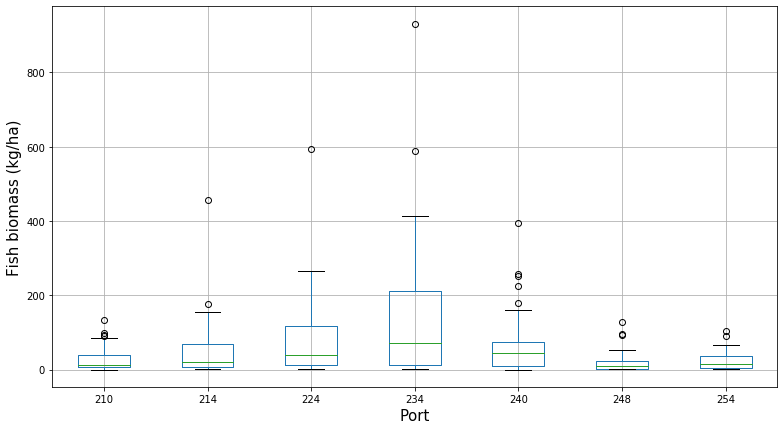

In [51]:
df_port_wise.boxplot(figsize=(13,7))
plt.xlabel('Port', fontsize=15)
plt.ylabel('Fish biomass (kg/ha)', fontsize=15)
plt.show()

C:\Users\elias\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\elias\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


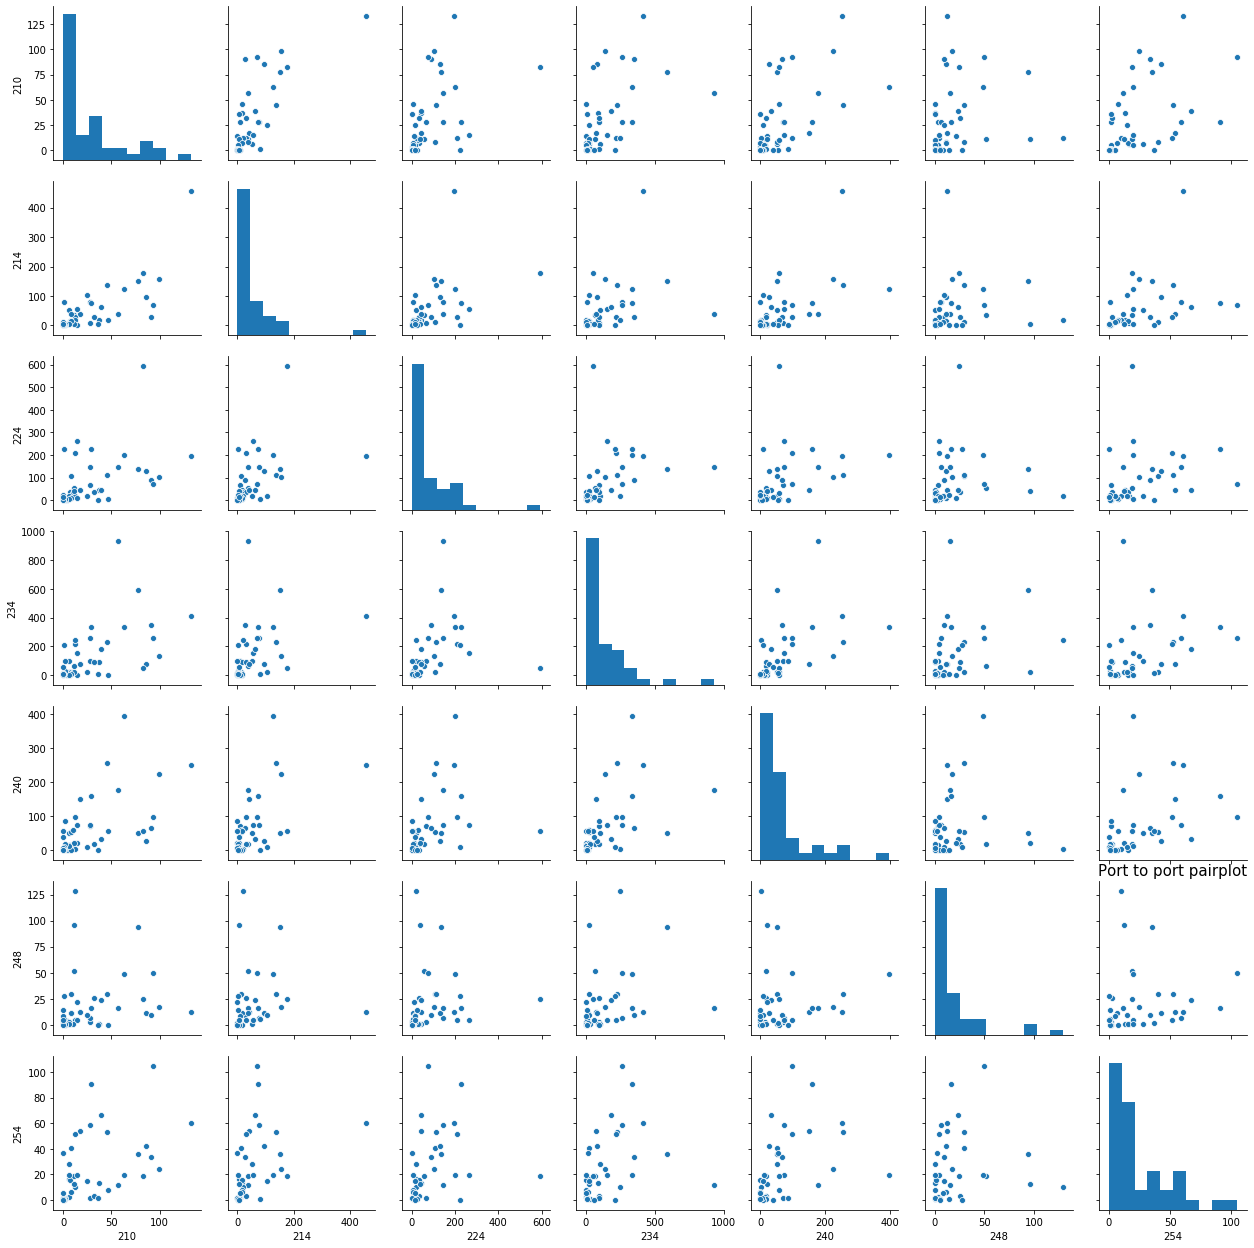

In [52]:
sns.pairplot(df_port_wise)
plt.title("Port to port pairplot", fontsize=15)
plt.show()

In [53]:
port_groupby = df_nearshore.groupby(['port', 'year', 'Species Name'])

In [54]:
df_port_year_species = port_groupby['kg/ha'].sum().unstack()

In [55]:
df_port_year_species.head(7)

Species Name   Alewife  Bloater  Burbot  Deepwater sculpin  Lake trout  \
port year                                                                
210  1973     23.90766  0.04738     0.0                0.0     0.00000   
     1974      5.49382  0.20830     0.0                0.0     0.00000   
     1975     33.94605  0.00475     0.0                0.0     0.00000   
     1976      3.64781  0.03087     0.0                0.0     0.00000   
     1977      1.67884  1.75836     0.0                0.0     3.53006   
     1978      4.69330  1.48791     0.0                0.0     0.09021   
     1979      3.13417  2.24554     0.0                0.0    11.15290   

Species Name  Lake whitefish  Ninespine stickleback  Rainbow Smelt  \
port year                                                            
210  1973            0.00000                0.02002        3.92553   
     1974            0.00000                0.02632        0.28541   
     1975            0.00000                0.01961        3.20750   
     1976            0.00000                0.28571        2.02454   
     1977            0.39223                0.05491        0.11881   
     1978            0.43341                0.03726        2.98803   
     1979            0.88251                0.37737       13.74318   

Species Name  Round goby  Slimy sculpin  Threespine stickleback  Yellow perch  
port year                                                                      
210  1973            0.0        0.00588                     0.0       0.00000  
     1974            0.0        0.01652                     0.0       0.42737  
     1975            0.0        0.28696                     0.0       0.00000  
     1976            0.0        0.53922                     0.0       0.00000  
     1977            0.0        0.14120                     0.0       0.00000  
     1978            0.0        1.00142                     0.0       0.72170  
     1979            0.0        0.11787                     0.0       0.00000

In [56]:
df_port_year_species.tail(5)

Species Name  Alewife  Bloater  Burbot  Deepwater sculpin  Lake trout  \
port year                                                               
254  2014     0.00000  0.00000     0.0                0.0         0.0   
     2015     0.00000  0.00000     0.0                0.0         0.0   
     2016     2.21705  0.01389     0.0                0.0         0.0   
     2017     0.00000  0.00000     0.0                0.0         0.0   
     2018     0.00000  0.00000     0.0                0.0         0.0   

Species Name  Lake whitefish  Ninespine stickleback  Rainbow Smelt  \
port year                                                            
254  2014            0.00000                0.05659        0.16210   
     2015            0.00000                0.01510        1.10431   
     2016            0.25838                0.02782        1.94688   
     2017            0.00000                0.00327        0.48169   
     2018            0.00000                0.00000        0.00496   

Species Name  Round goby  Slimy sculpin  Threespine stickleback  Yellow perch  
port year                                                                      
254  2014        1.29932        0.01601                     0.0           0.0  
     2015        0.00000        0.00000                     0.0           0.0  
     2016        0.71555        0.00595                     0.0           0.0  
     2017        0.01797        0.00000                     0.0           0.0  
     2018        0.01289        0.00000                     0.0           0.0